In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[[4376, 3407, -17782], [12848, -11134, -829], [21125, -16079, 15099], [19805, 11392, 11898], [8145, 15629, -13580], [3918, 7356, -20320], [11228, -6767, -2158], [20358, -16172, 8985], [25882, -9619, 28434], [23361, 6314, 10927], [12201, 14882, -8202], [5578, 10173, -14770], [8238, -2404, -12843], [17027, -13517, 1257], [24942, -13241, 25927], [25890, 1124, 16822], [15676, 15109, -2426], [6082, -923, -21656], [14250, -11246, -3367], [23048, -16020, 24097], [27095, -2485, 19816], [19249, 13067, 5378], [8870, 14431, -17565], [4852, 5526, -15096], [12604, -7793, -2234], [20513, -16790, 18023], [26224, -9189, 26744], [23034, 6276, 14435], [14086, 14807, -6211], [5514, 9738, -12025], [8699, -4151, 3015], [17282, -15874, 10879], [25909, 2385, 20734], [17055, 13687, 2342], [5843, 11862, -3375], [6804, 42, -1860], [15460, -13182, 5942], [23315, -16212, 26768], [26676, -4598, 25572], [20852, 10166, 11605], [9848, 14746, -5836], [5837, 4868, -16163], [10895, -10217, -248], [19686, -17896, 20733],

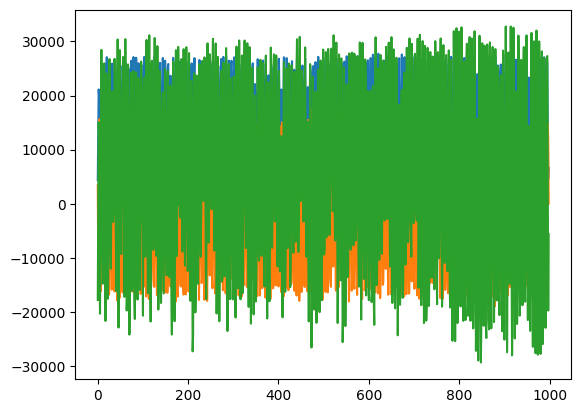

In [ ]:
RutaFile="/content/drive/MyDrive/prueba2/no 1 ball.json.5et8502p.ingestion-557cd89bdb-m48t8.json"
dataframe = pd.read_json(RutaFile)
#print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
#print(Valores.shape)
#print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd


directory = '/content/drive/MyDrive/pruebas/Training/'


files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes

sequence_length = 64
sequence_stride = 10


all_spectral_features = []
all_labels = []

def extract_spectral_features(data, fs=49):
    features = []
    for axis_data in data.T:
        fft_result = np.fft.fft(axis_data)
        freqs = np.fft.fftfreq(len(axis_data), 1/fs)
        magnitude = np.abs(fft_result)
        positive_freqs = freqs[:len(freqs)//2]
        positive_magnitude = magnitude[:len(magnitude)//2]
        dominant_freq = positive_freqs[np.argmax(positive_magnitude)]
        total_energy = np.sum(positive_magnitude**2)
        low_band = np.sum(positive_magnitude[(positive_freqs < 10)]**2)
        mid_band = np.sum(positive_magnitude[(positive_freqs >= 10) & (positive_freqs < 20)]**2)
        high_band = np.sum(positive_magnitude[(positive_freqs >= 20)]**2)
        mean_amplitude = np.mean(positive_magnitude)
        std_amplitude = np.std(positive_magnitude)
        features.append([dominant_freq, total_energy, low_band, mid_band, high_band, mean_amplitude, std_amplitude])
    return np.concatenate(features)


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)


    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)


    current_class = idx // files_per_class


    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )


    X_windows = np.concatenate([x.numpy() for x in dataset], axis=0)


    n_samples, _, n_axes = X_windows.shape
    spectral_features = np.zeros((n_samples, 7 * n_axes))
    for i in range(n_samples):
        spectral_features[i, :] = extract_spectral_features(X_windows[i])

    labels = np.full((n_samples,), current_class)

    all_spectral_features.append(spectral_features)
    all_labels.append(labels)

all_spectral_features = np.vstack(all_spectral_features)
all_labels = np.concatenate(all_labels)





Forma de las ventanas: (2275, 64, 3)
Forma de las etiquetas: (2275,)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 62, 32)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_2           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,541 (6.02 KB)

 Trainable params: 1,541 (6.02 KB)

 Non-trainable params: 0 (0.00 B)

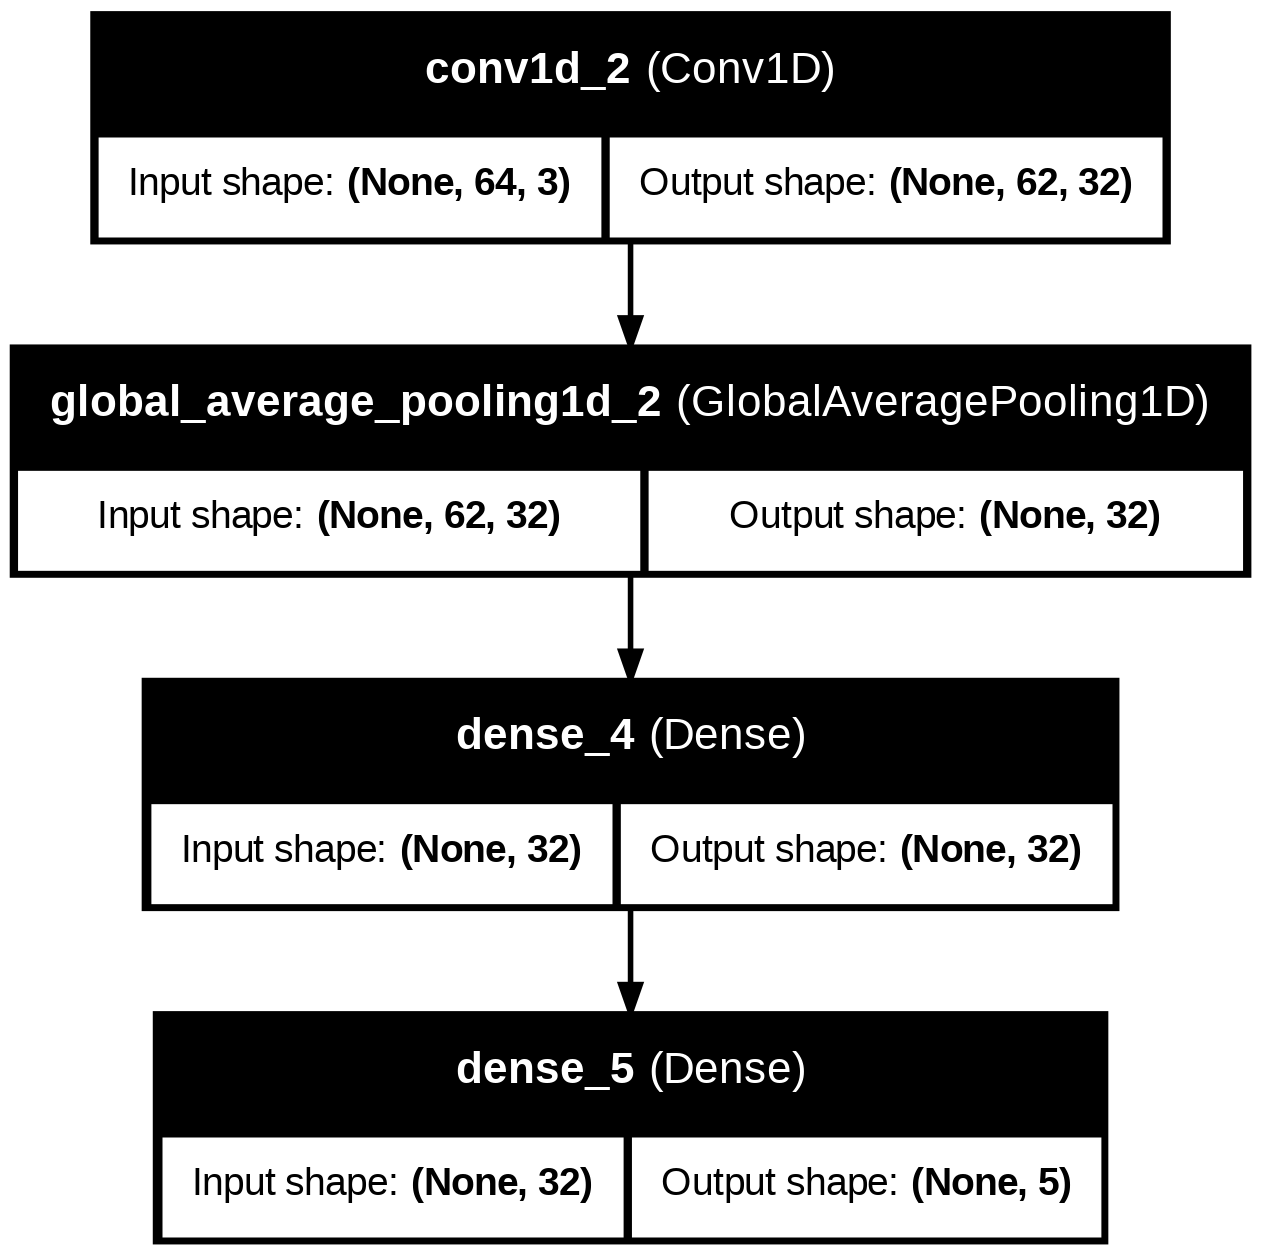

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D, Dropout

modelo_cnn = Sequential()
modelo_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 3)))
modelo_cnn.add(GlobalAveragePooling1D())
modelo_cnn.add(Dense(32, activation='relu'))
modelo_cnn.add(Dense(5, activation='softmax'))

modelo_cnn.summary()

modelo_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

keras.utils.plot_model(modelo_cnn, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    all_windows, labelsN, test_size=0.20, random_state=42
)


In [ ]:
historia = modelo_cnn.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=30, batch_size=32)

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1750 - loss: 1144.4989 - val_accuracy: 0.8374 - val_loss: 11.7377
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8967 - loss: 5.0504 - val_accuracy: 0.9451 - val_loss: 2.0216
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9348 - loss: 2.9405 - val_accuracy: 0.9473 - val_loss: 1.6632
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.7579 - val_accuracy: 0.9890 - val_loss: 0.2980
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 1.0438 - val_accuracy: 0.9670 - val_loss: 1.0134
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9715 - loss: 0.8931 - val_accuracy: 0.9582 - val_loss: 1.1529
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.4540 - val_accuracy: 0.9890 - val_loss: 0.3845
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.2295 - val_accuracy: 0.9692 - val_

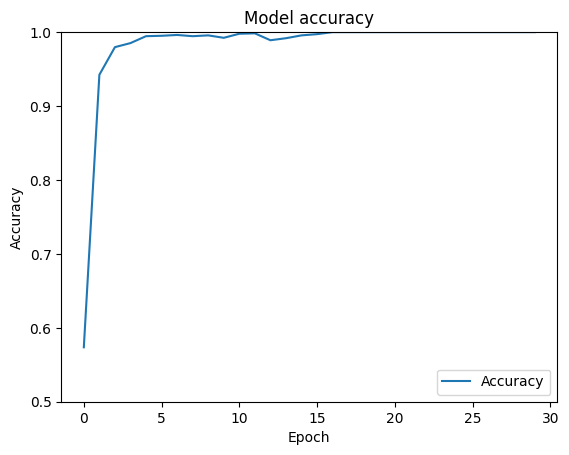

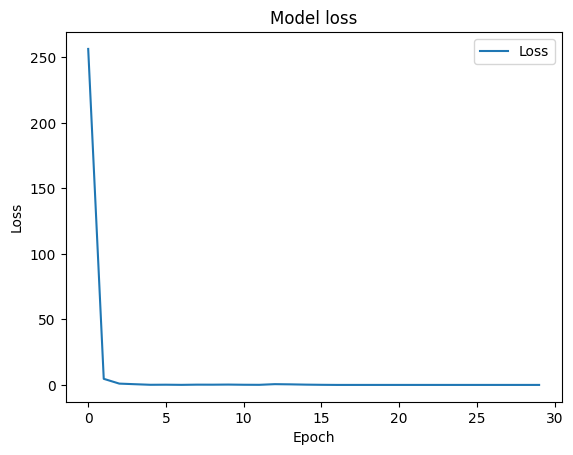

In [ ]:
plt.plot(historia.history['accuracy'], label='Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)

plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
modelo_cnn.evaluate(X_val, y_val)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 


[0.0, 1.0]

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

nuevo_archivo1 = '/content/drive/MyDrive/prueba2/normal bearing.json.5et72d3t.ingestion-557cd89bdb-m48t8.json'

dataframe = pd.read_json(nuevo_archivo1)
ValoresN = dataframe.iloc[:, :].values
DatosOriDF1 = ValoresN[7, 2][0:-1]
DatosOriNP1 = np.array(DatosOriDF1)

Datos = DatosOriNP1[0:64]
Datos = Datos.reshape(-1, 3)
Datos = np.expand_dims(Datos, axis=0)


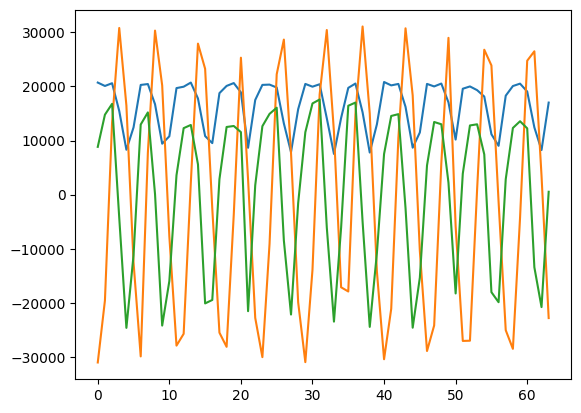

In [ ]:
plt.plot(Datos[0,:,:])

In [ ]:
reshaped=Datos.reshape(-1)
print(reshaped)

[ 20701 -31002   8825  20074 -19564  14767  20583  13348  16774  15452
  30786  -4267   8294  16461 -24608  12430 -12556 -11175  20265 -29880
  12953  20429   7765  15191  16709  30299    100   9411  20177 -24184
  10779  -7695 -15966  19680 -27888   3591  19938 -25706  12280  20702
   2163  12873  17758  27891   5586  10818  23245 -20091   9517  -2580
 -19454  18751 -25495   2859  20081 -28111  12498  20610  -3724  12682
  18898  25298  11548   8656   2810 -21527  17490 -22766   1727  20271
 -30016  12645  20327  -9100  14917  19792  22236  16058  13155  28640
  -8451   7863   7715 -22144  15786 -19908  -1551  20452 -30940  11528
  19943 -13885  16850  20392  18515  17572  14100  30409  -6066   7520
  11568 -23456  14163 -17114  -6096  19722 -17889  16421  20521  14843
  17007  15209  31063  -4981   7773  15006 -24427  12995 -14198 -10781
  20809 -30403   7500  20183 -21089  14533  20450  10459  14868  16221
  30725  -2490   8674  18335 -24577  11486 -10397 -15328  20455 -28888
   539

In [ ]:
predicciones = modelo_cnn.predict(Datos)

clases_predichas = np.argmax(predicciones, axis=1)

print(clases_predichas)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
[4]


In [ ]:

directory = '/content/drive/MyDrive/pruebas/Testing'

files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

num_classes = 5
files_per_class = cantidadFiles // num_classes


sequence_length = 64
sequence_stride = 10

all_windowsT = []
all_labelsT = []


for idx, file in enumerate(files):
    RutaFile = os.path.join(directory, file)

    dataframe = pd.read_json(RutaFile)
    Valores = dataframe.iloc[:, :].values
    DatosOriDF = Valores[7, 2][0:-1]
    DatosOriNP = np.array(DatosOriDF)

    Datos = DatosOriNP[0:970]
    Datos = Datos.reshape(-1, 3)

    current_class = idx // files_per_class

    dataset = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=Datos,
        targets=None,
        sequence_length=sequence_length,
        sequence_stride=sequence_stride,
        batch_size=32,
    )

    X_windowsT = np.concatenate([x.numpy() for x in dataset], axis=0)

    labelsT = np.full((X_windowsT.shape[0],), current_class)

    all_windowsT.append(X_windowsT)
    all_labelsT.append(labelsT)

all_windowsT = np.vstack(all_windowsT)
all_labelsT = np.concatenate(all_labelsT)

print(f"Forma de las ventanas: {all_windowsT.shape}")
print(f"Forma de las etiquetas: {all_labelsT.shape}")

Forma de las ventanas: (4095, 64, 3)
Forma de las etiquetas: (4095,)


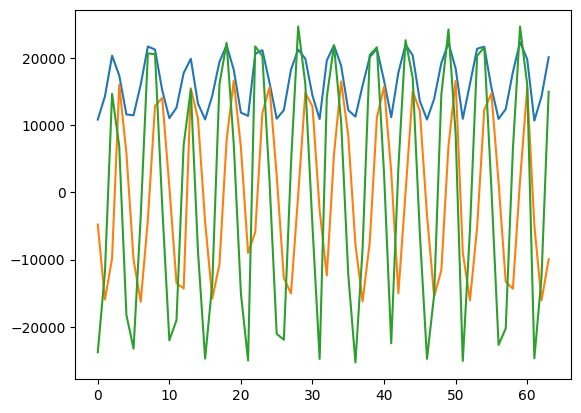

In [ ]:
plt.plot(all_windowsT[800,:,:])

In [ ]:
modelo_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 62, 32)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,625 (18.07 KB)

 Trainable params: 1,541 (6.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,084 (12.05 KB)

In [ ]:
predicciones = modelo_cnn.predict(all_windowsT,batch_size=4095)
clases_predichas = np.argmax(predicciones, axis=1)

print(clases_predichas.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step
(4095,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = all_labelsT

y_pred = clases_predichas

matriz_confusion = confusion_matrix(y_true, y_pred)

print("Matriz de Confusión:")
print(matriz_confusion)



Matriz de Confusión:
[[669  65  12  73   0]
 [557   0 171  91   0]
 [  0 819   0   0   0]
 [681   0 101  37   0]
 [  8   0 810   1   0]]


In [ ]:
from sklearn.metrics import recall_score, f1_score
# Recall
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Recall: 0.1724053724053724
F1-score: 0.11237415875968237


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.1724


#Export model

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo_cnn)
tflite_model = converter.convert()

with open("cnn4.tflite", "wb") as f:
    f.write(tflite_model)
print("Modelo híbrido cuantizado guardado.")


Saved artifact at '/tmp/tmptllkcm6i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  132552166166192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132551647247200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132551647643072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132551647643776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132551647649408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132551619857568: TensorSpec(shape=(), dtype=tf.resource, name=None)
Modelo híbrido cuantizado guardado.


In [ ]:
!python -m pip install edgeimpulse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninstalling pydantic-2.10.3:
      Successful

In [ ]:
import edgeimpulse as ei
ei.API_KEY = "ei_xxxxxxxxx"

download_dir = "./"
deploy_filename = "CNN_model_3.zip"
deploy_bytes = None

try:
  deploy_bytes = ei.model.deploy(tflite_model, model_output_type= ei.model.output_type.Classification(),deploy_target="arduino")

except Exception as e:
  print(f"could not deploy model: {e}")

if deploy_bytes is not None:
  with open(deploy_filename, "wb") as f:
    f.write(deploy_bytes.getvalue())